# Exploratory Data Analysis

## Data Loading

In [23]:
LABELS = {"f1", "f2", "f3", "f4", "f5", "f6", "f7", "f8", "f9", "f10", "m1", "m2", "m3", "m4", "m5", "m6", "m7", "m8", "m9", "m10"}
CLASS_1_LABELS = {'f1', 'f7', 'f8', 'm3', 'm6', 'm8'}
CLASS_2_LABELS = {'f2', 'f3', 'f4', 'f5', 'f6', 'f9', 'f10', 'm1', 'm2', 'm4', 'm5', 'm7', 'm9', 'm10'}


In [16]:
import glob
import librosa


files = glob.glob("../data/raw/*.wav")

recordings = []

for file in files:
    audio_data, sample_rate = librosa.load(file)
    
    recordings.append({
        "audio_data": audio_data,
        "sample_rate": sample_rate,
        "label": file.split("_")[0],
        "file": file.split("/")[-1]
	})


## Waveforms

In [ ]:
import matplotlib.pyplot as plt
import librosa.display

for label in LABELS:
	recording = list(filter(lambda r: r["file"] == f"{label}_script1_cleanraw.wav", recordings))[0]

	plt.figure(figsize=(12, 2))

	librosa.display.waveshow(recording["audio_data"], sr=recording["sample_rate"])

	plt.title(f'{label} script 1')
	plt.show()


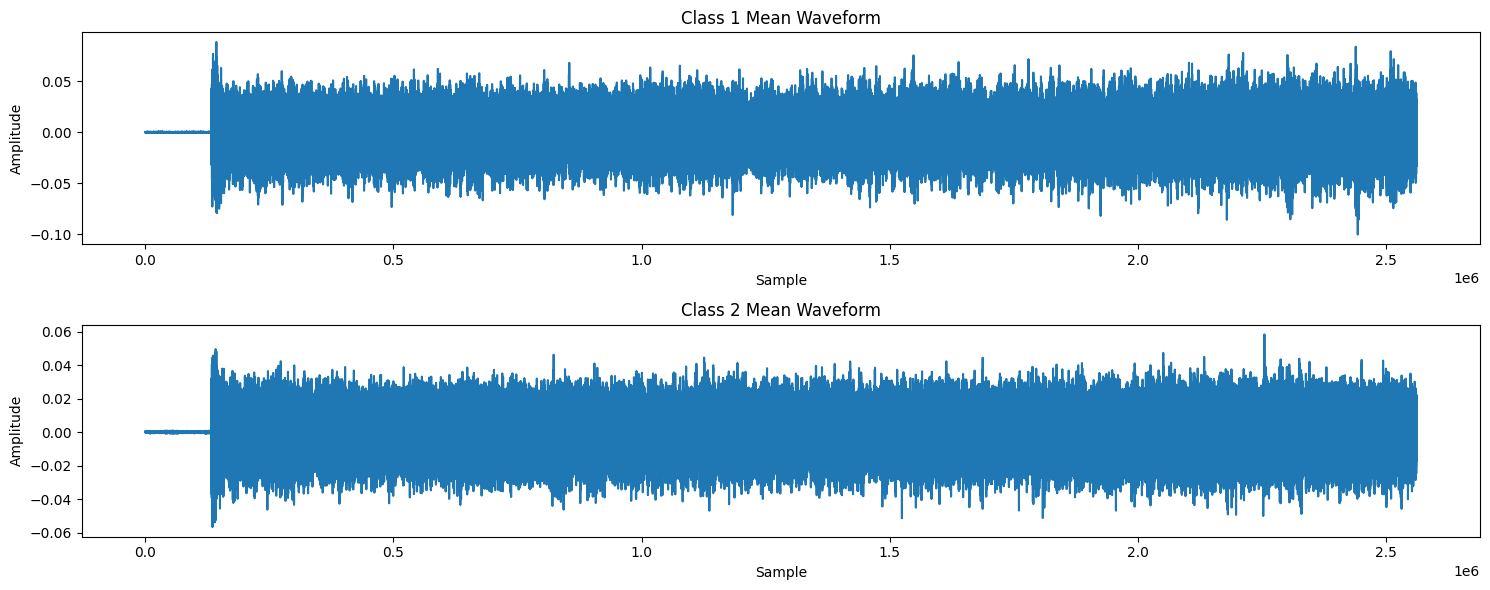

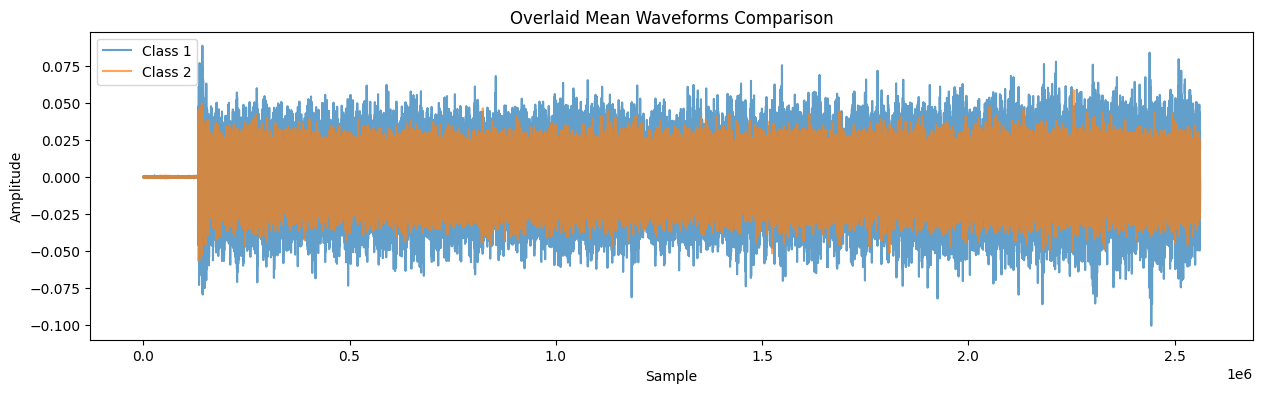

In [25]:
import numpy as np


class_1_recordings = [r for r in recordings if r["label"].split("/")[-1] in CLASS_1_LABELS]
class_2_recordings = [r for r in recordings if r["label"].split("/")[-1] in CLASS_2_LABELS]

# Find minimum length to normalize all recordings
min_length = min(min(len(r["audio_data"]) for r in class_1_recordings),
                min(len(r["audio_data"]) for r in class_2_recordings))

# Calculate mean waveforms
class_1_mean = np.mean([r["audio_data"][:min_length] for r in class_1_recordings], axis=0)
class_2_mean = np.mean([r["audio_data"][:min_length] for r in class_2_recordings], axis=0)

# Plot comparison
plt.figure(figsize=(15, 6))

plt.subplot(2, 1, 1)
plt.plot(class_1_mean)
plt.title('Class 1 Mean Waveform')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(class_2_mean)
plt.title('Class 2 Mean Waveform')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

# Plot overlaid comparison
plt.figure(figsize=(15, 4))
plt.plot(class_1_mean, label='Class 1', alpha=0.7)
plt.plot(class_2_mean, label='Class 2', alpha=0.7)
plt.title('Overlaid Mean Waveforms Comparison')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

## Spectrograms

In [ ]:
import numpy as np


for label in LABELS:
	recording = list(filter(lambda r: r["file"] == f"{label}_script1_cleanraw.wav", recordings))[0]
  
	X = librosa.stft(recording["audio_data"])
	Xdb = librosa.amplitude_to_db(abs(X))
	plt.figure(figsize=(12, 2))
	librosa.display.specshow(Xdb, sr=recording["sample_rate"], x_axis='time', y_axis='hz')
	plt.colorbar()
	plt.title(f'{label} script 1')
	plt.show()


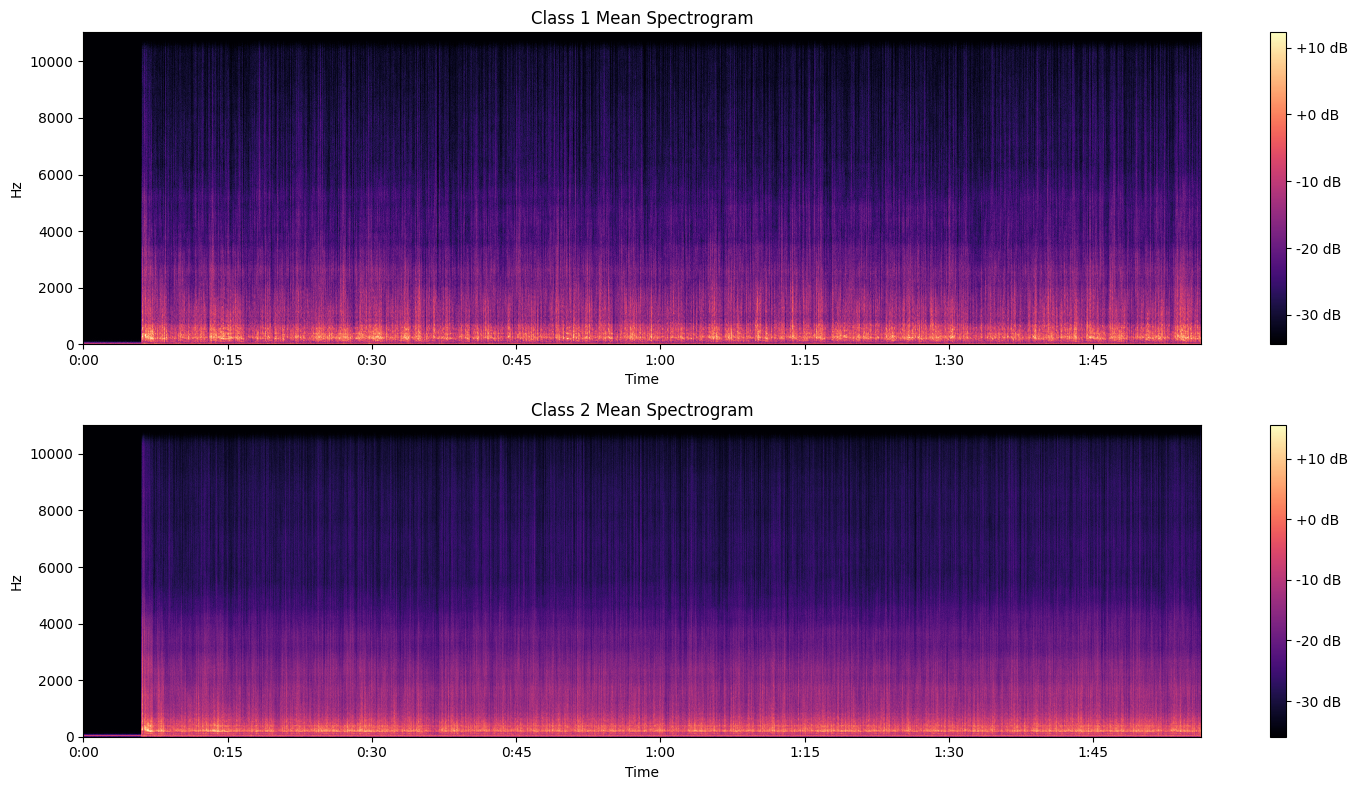

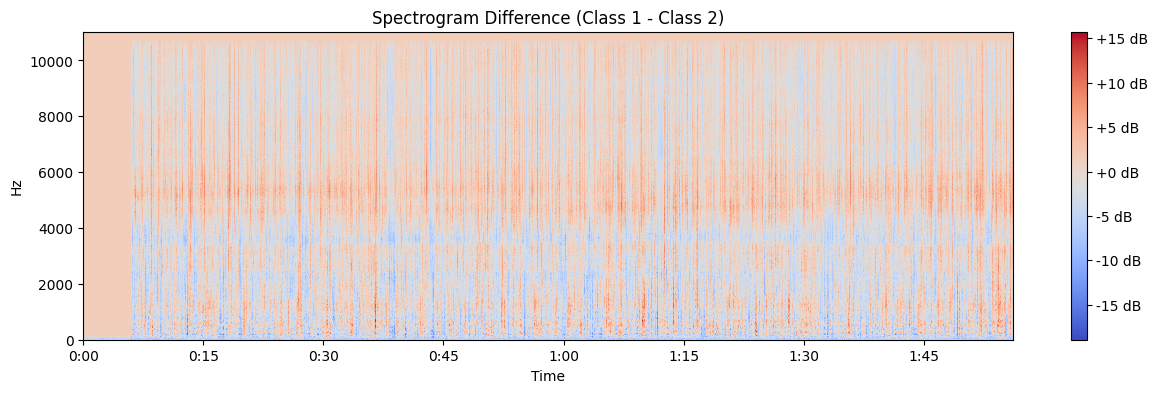

In [26]:
# Calculate mean spectrograms for each class
class_1_specs = []
class_2_specs = []

# Calculate spectrograms for each class
for recording in class_1_recordings:
    X = librosa.stft(recording["audio_data"][:min_length])
    Xdb = librosa.amplitude_to_db(abs(X))
    class_1_specs.append(Xdb)
    
for recording in class_2_recordings:
    X = librosa.stft(recording["audio_data"][:min_length])
    Xdb = librosa.amplitude_to_db(abs(X))
    class_2_specs.append(Xdb)

# Calculate means
class_1_mean_spec = np.mean(class_1_specs, axis=0)
class_2_mean_spec = np.mean(class_2_specs, axis=0)

# Plot comparison
plt.figure(figsize=(15, 8))

plt.subplot(2, 1, 1)
librosa.display.specshow(class_1_mean_spec, sr=recording["sample_rate"], 
                        x_axis='time', y_axis='hz')
plt.colorbar(format='%+2.0f dB')
plt.title('Class 1 Mean Spectrogram')

plt.subplot(2, 1, 2)
librosa.display.specshow(class_2_mean_spec, sr=recording["sample_rate"], 
                        x_axis='time', y_axis='hz')
plt.colorbar(format='%+2.0f dB')
plt.title('Class 2 Mean Spectrogram')

plt.tight_layout()
plt.show()

# Calculate and plot the difference between spectrograms
spec_difference = class_1_mean_spec - class_2_mean_spec

plt.figure(figsize=(15, 4))
img = librosa.display.specshow(spec_difference, sr=recording["sample_rate"], 
                             x_axis='time', y_axis='hz')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram Difference (Class 1 - Class 2)')
plt.show()


## MEL Spectrograms

In [ ]:
import numpy as np


for label in LABELS:
	recording = list(filter(lambda r: r["file"] == f"{label}_script1_cleanraw.wav", recordings))[0]
  
	S = librosa.feature.melspectrogram(y=recording["audio_data"], sr=recording["sample_rate"])
	S_dB = librosa.power_to_db(S, ref=np.max)
	plt.figure(figsize=(14, 5))
	
	librosa.display.specshow(S_dB, sr=recording["sample_rate"], x_axis='time', y_axis='mel')
	plt.colorbar(format='%+2.0f dB')
	plt.title(f'{label} script 1')
	plt.show()


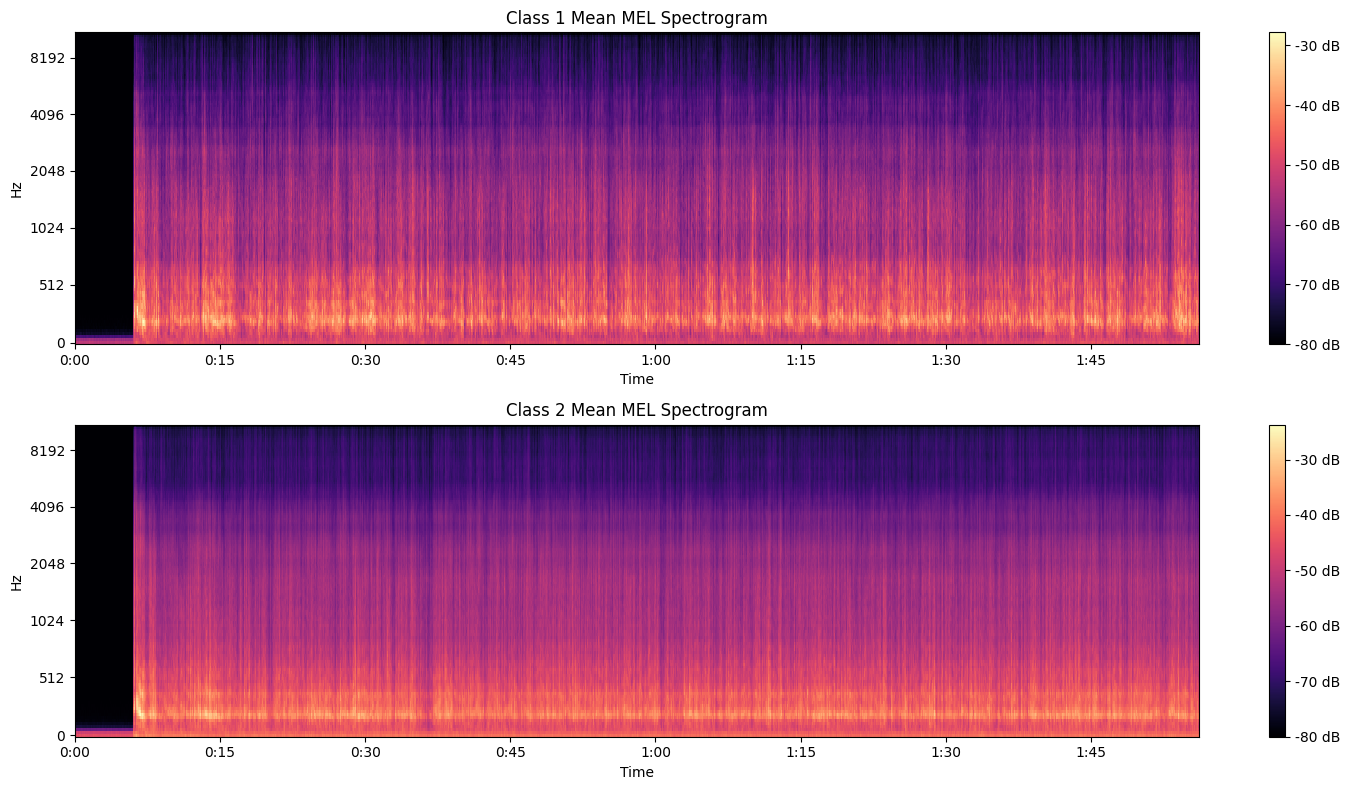

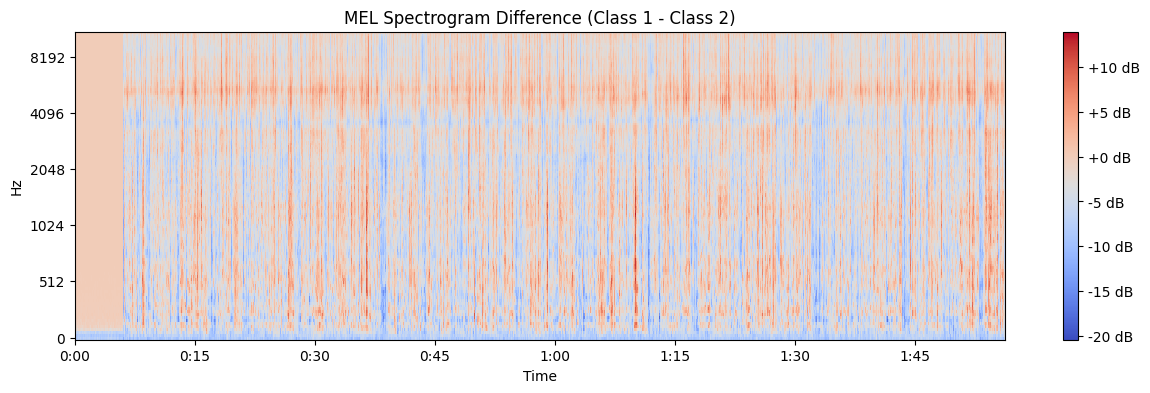

In [27]:
# Calculate mean MEL spectrograms for each class
class_1_mel_specs = []
class_2_mel_specs = []

# Calculate MEL spectrograms for each class
for recording in class_1_recordings:
    S = librosa.feature.melspectrogram(y=recording["audio_data"][:min_length], 
                                     sr=recording["sample_rate"])
    S_dB = librosa.power_to_db(S, ref=np.max)
    class_1_mel_specs.append(S_dB)
    
for recording in class_2_recordings:
    S = librosa.feature.melspectrogram(y=recording["audio_data"][:min_length], 
                                     sr=recording["sample_rate"])
    S_dB = librosa.power_to_db(S, ref=np.max)
    class_2_mel_specs.append(S_dB)

# Calculate means
class_1_mean_mel = np.mean(class_1_mel_specs, axis=0)
class_2_mean_mel = np.mean(class_2_mel_specs, axis=0)

# Plot comparison
plt.figure(figsize=(15, 8))

plt.subplot(2, 1, 1)
librosa.display.specshow(class_1_mean_mel, sr=recording["sample_rate"], 
                        x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Class 1 Mean MEL Spectrogram')

plt.subplot(2, 1, 2)
librosa.display.specshow(class_2_mean_mel, sr=recording["sample_rate"], 
                        x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Class 2 Mean MEL Spectrogram')

plt.tight_layout()
plt.show()

# Calculate and plot the difference between MEL spectrograms
mel_difference = class_1_mean_mel - class_2_mean_mel

plt.figure(figsize=(15, 4))
img = librosa.display.specshow(mel_difference, sr=recording["sample_rate"], 
                             x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('MEL Spectrogram Difference (Class 1 - Class 2)')
plt.show()


## Mel-Frequency Cepstral Coefficients (MFCCs)

In [ ]:
import seaborn as sns


for label in LABELS:
	recording = list(filter(lambda r: r["file"] == f"{label}_script1_cleanraw.wav", recordings))[0]

	mfccs = librosa.feature.mfcc(y=recording["audio_data"], sr=recording["sample_rate"], n_mfcc=13)

	sns.histplot(mfccs.flatten(), kde=True)
	plt.title(f'{label} script 1')
	plt.show()



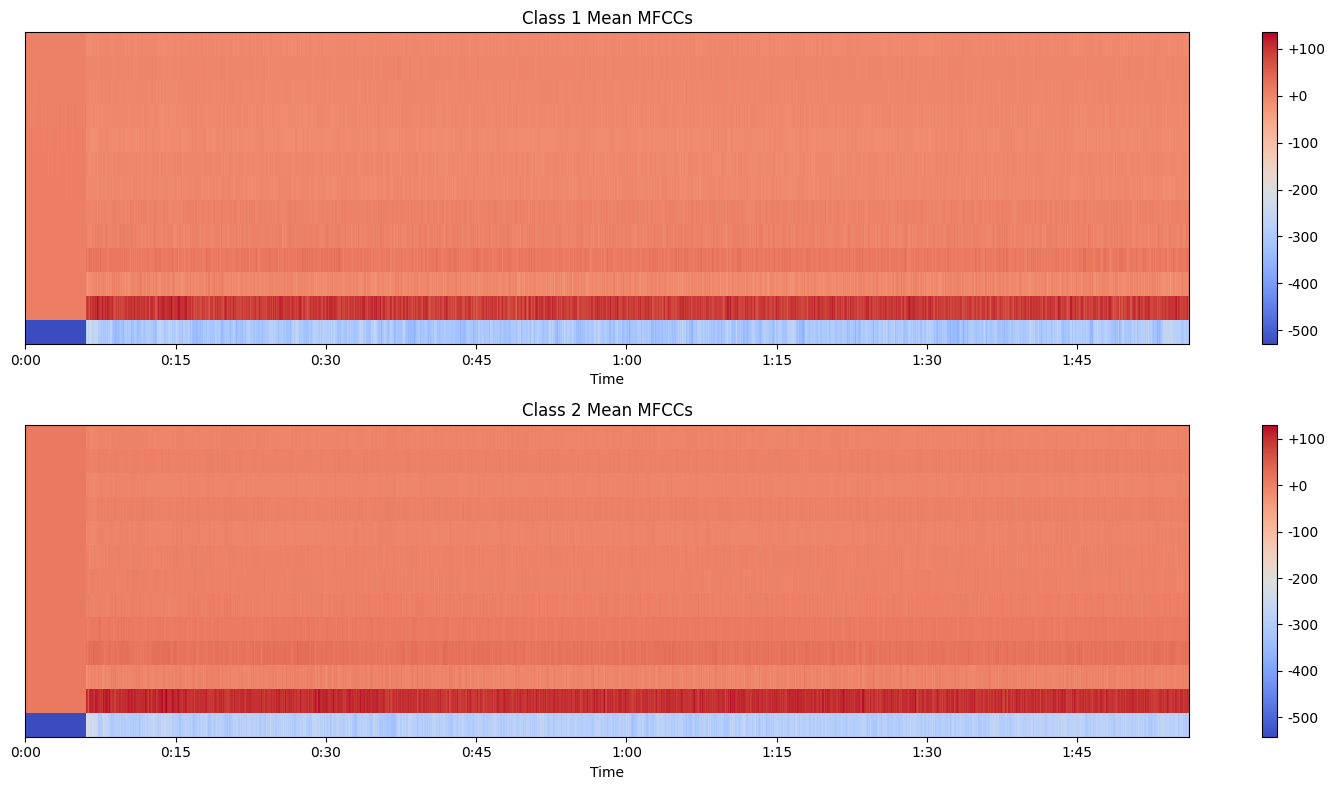

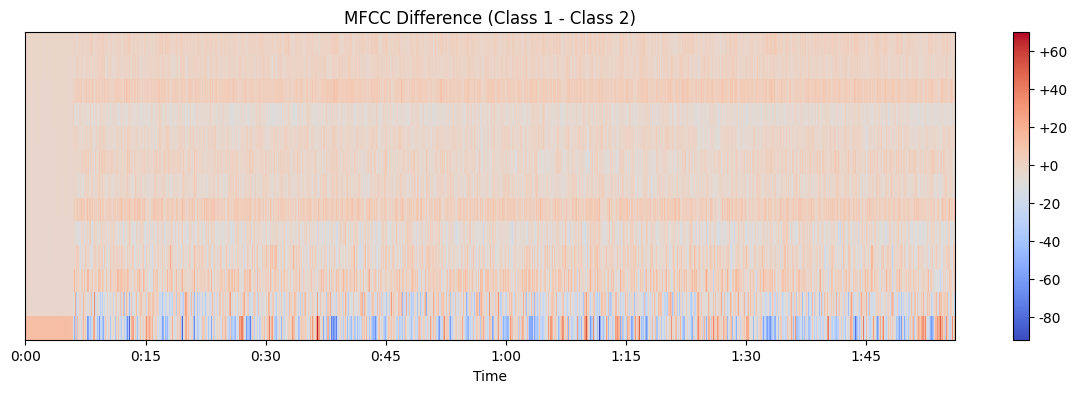

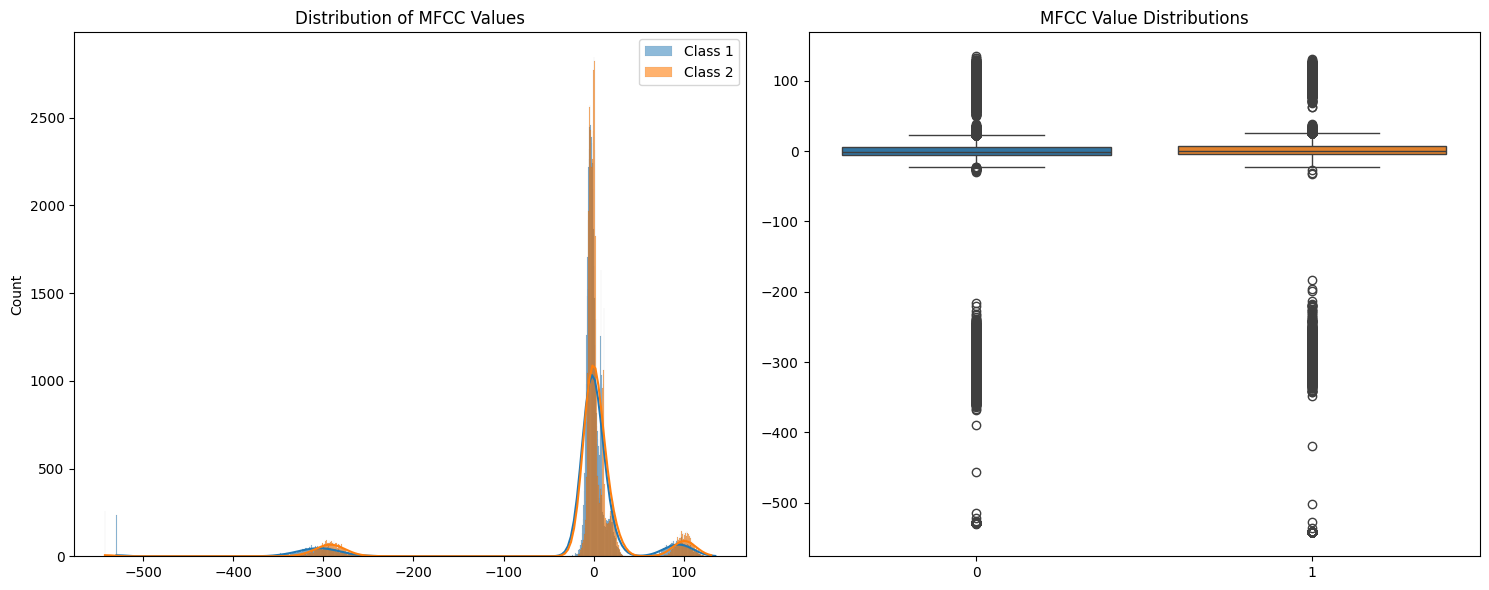

In [33]:
# Calculate MFCCs for each class
class_1_mfccs = []
class_2_mfccs = []

# Calculate MFCCs for each class
for recording in class_1_recordings:
    mfccs = librosa.feature.mfcc(y=recording["audio_data"][:min_length], 
                                sr=recording["sample_rate"], 
                                n_mfcc=13)
    class_1_mfccs.append(mfccs)
    
for recording in class_2_recordings:
    mfccs = librosa.feature.mfcc(y=recording["audio_data"][:min_length], 
                                sr=recording["sample_rate"], 
                                n_mfcc=13)
    class_2_mfccs.append(mfccs)

# Calculate means
class_1_mean_mfcc = np.mean(class_1_mfccs, axis=0)
class_2_mean_mfcc = np.mean(class_2_mfccs, axis=0)

# Plot comparison
plt.figure(figsize=(15, 8))

plt.subplot(2, 1, 1)
librosa.display.specshow(class_1_mean_mfcc, sr=recording["sample_rate"], 
                        x_axis='time')
plt.colorbar(format='%+2.0f')
plt.title('Class 1 Mean MFCCs')

plt.subplot(2, 1, 2)
librosa.display.specshow(class_2_mean_mfcc, sr=recording["sample_rate"], 
                        x_axis='time')
plt.colorbar(format='%+2.0f')
plt.title('Class 2 Mean MFCCs')

plt.tight_layout()
plt.show()

# Calculate and plot the difference between MFCCs
mfcc_difference = class_1_mean_mfcc - class_2_mean_mfcc

plt.figure(figsize=(15, 4))
img = librosa.display.specshow(mfcc_difference, sr=recording["sample_rate"], 
                             x_axis='time')
plt.colorbar(format='%+2.0f')
plt.title('MFCC Difference (Class 1 - Class 2)')
plt.show()

# Plot distribution of MFCC values
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.histplot(class_1_mean_mfcc.flatten(), kde=True, label='Class 1')
sns.histplot(class_2_mean_mfcc.flatten(), kde=True, label='Class 2', alpha=0.6)
plt.title('Distribution of MFCC Values')
plt.legend()

plt.subplot(1, 2, 2)
sns.boxplot(data=[class_1_mean_mfcc.flatten(), class_2_mean_mfcc.flatten()])
plt.title('MFCC Value Distributions')

plt.tight_layout()
plt.show()



## Spectral Features and PCA

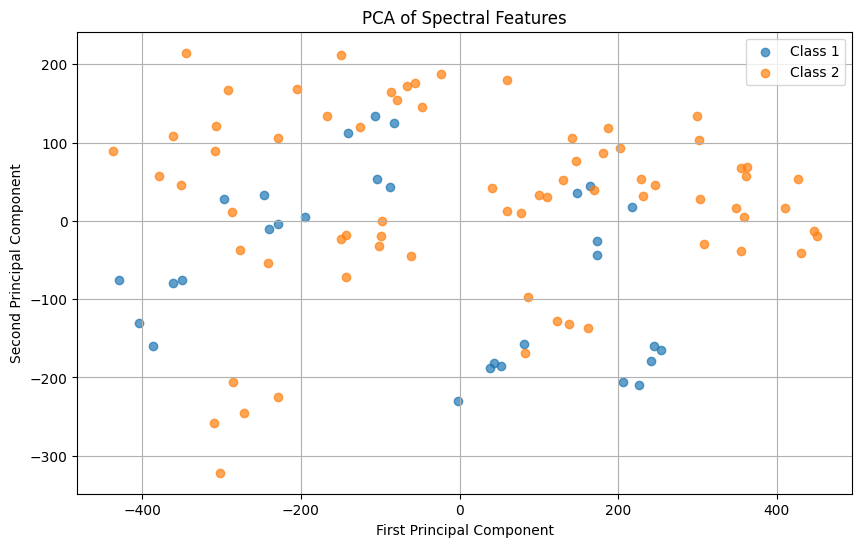

Explained variance ratio: [0.72809394 0.17659895]


In [37]:
import numpy as np
from sklearn.decomposition import PCA


# Calculate spectral features for each recording and prepare for PCA
features_list = []
labels_list = []

for recording in recordings:
    # Extract features
    mfccs = librosa.feature.mfcc(y=recording["audio_data"], sr=recording["sample_rate"], n_mfcc=13)
    spectral_centroids = librosa.feature.spectral_centroid(y=recording["audio_data"], sr=recording["sample_rate"])[0]
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=recording["audio_data"], sr=recording["sample_rate"])[0]
    
    # Combine features into a single vector
    feature_vector = np.hstack((
        np.mean(mfccs, axis=1),
        np.std(mfccs, axis=1),
        [np.mean(spectral_centroids)],
        [np.std(spectral_centroids)],
        [np.mean(spectral_bandwidth)],
        [np.std(spectral_bandwidth)]
    ))
    
    features_list.append(feature_vector)
    labels_list.append(1 if recording["label"].split("/")[-1] in CLASS_1_LABELS else 2)

# Convert to numpy array and apply PCA
features_array = np.array(features_list)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features_array)

# Plot results
plt.figure(figsize=(10, 6))
for class_num in [1, 2]:
    mask = np.array(labels_list) == class_num
    plt.scatter(
        principal_components[mask, 0],
        principal_components[mask, 1],
        label=f'Class {class_num}',
        alpha=0.7
    )

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA of Spectral Features')
plt.legend()
plt.grid(True)
plt.show()

# Print explained variance ratio
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")


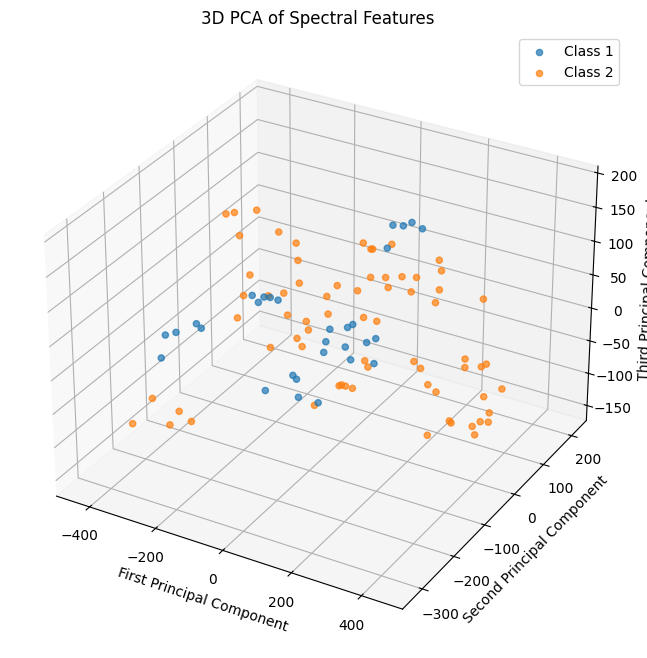

Explained variance ratio: [0.72809394 0.17659895 0.05642277]


In [38]:
import numpy as np
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D  # Import for 3D plotting

# Calculate spectral features for each recording and prepare for PCA
features_list = []
labels_list = []

for recording in recordings:
    # Extract features
    mfccs = librosa.feature.mfcc(y=recording["audio_data"], sr=recording["sample_rate"], n_mfcc=13)
    spectral_centroids = librosa.feature.spectral_centroid(y=recording["audio_data"], sr=recording["sample_rate"])[0]
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=recording["audio_data"], sr=recording["sample_rate"])[0]
    
    # Combine features into a single vector
    feature_vector = np.hstack((
        np.mean(mfccs, axis=1),
        np.std(mfccs, axis=1),
        [np.mean(spectral_centroids)],
        [np.std(spectral_centroids)],
        [np.mean(spectral_bandwidth)],
        [np.std(spectral_bandwidth)]
    ))
    
    features_list.append(feature_vector)
    labels_list.append(1 if recording["label"].split("/")[-1] in CLASS_1_LABELS else 2)

# Convert to numpy array and apply PCA with 3 components
features_array = np.array(features_list)
pca = PCA(n_components=3)
principal_components = pca.fit_transform(features_array)

# Create 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

for class_num in [1, 2]:
    mask = np.array(labels_list) == class_num
    ax.scatter(
        principal_components[mask, 0],
        principal_components[mask, 1],
        principal_components[mask, 2],
        label=f'Class {class_num}',
        alpha=0.7
    )

ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')
ax.set_title('3D PCA of Spectral Features')
plt.legend()
plt.show()

# Print explained variance ratio
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
